In [345]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.util.testing as tm

# importing library for confusion matrix and classification report to calculate the metrics
from sklearn.metrics import classification_report, confusion_matrix

We will look into Advertising dataset which was obtained from ISLR-http://www-bcf.usc.edu/~gareth/ISL/data.html. This dataset has sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

Our main goal is to come up with a marketing plan that will result in high product sales. 

1. Is there any relationship between advertising budget and sales?

2. How strong is the relationship between advertising budget and sales if there is one and Is the relationship Linear?

3. Which media contribute to sales?

4. How accurately can we estimate the effect of each medium on sales?

5. How accurately can we predict future sales?

In [346]:
# Importing dataset
ad = pd.read_csv("Advertising.csv")

In [347]:
# Looking at the first 5 rows
ad.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [348]:
ad = ad[["TV", "Radio", "Newspaper","Sales"]]
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [349]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [350]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# DATA VISUALIZATION

Data visualization will help us visualize and see if our variables have a relationship by plotting a scatter plot.

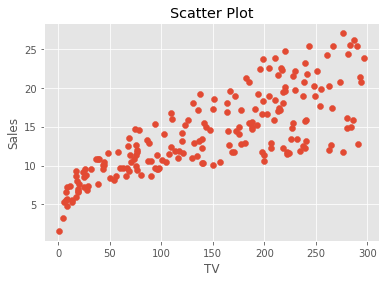

In [351]:
# Scatter plot with Sales against Tv ad budget
plt.scatter(ad['TV'], ad['Sales'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('TV')
plt.ylabel('Sales')
  
plt.show()

From the plot of sales against Tv adverstising, we can observe that sales increases as the budget of Tv ad increases. Thus, we can see that there is a relationship between these two variables.

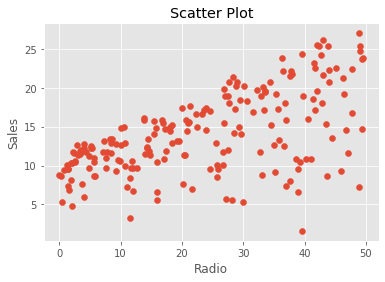

In [352]:
# Scatter plot with Sales against Radio ad budget
plt.scatter(ad['Radio'], ad['Sales'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Radio')
plt.ylabel('Sales')
  
plt.show()

From the plot of sales against Radio adverstising, we can observe that sales increases as the budget of Radio ad increases. We observe similar trend as Tv ad budget. Thus, we can see that there is a relationship between these two variables.

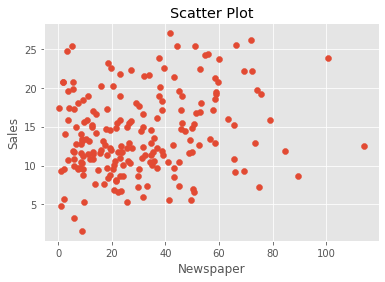

In [353]:
# Scatter plot with Sales against Newspaper
plt.scatter(ad['Newspaper'], ad['Sales'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Newspaper')
plt.ylabel('Sales')
  
plt.show()

From the plot of sales against Newspaper adverstising, we can observe that sales increases without increase of the budget of Newspaper ad budget. Here we can observe a weak relationship between variables compare to TV and Radio ad budget which they had strong relatioship. 

# SUPERVISED LEARNING

It is also known as Supervised Machine Learning. It uses labeled datasets to train algorithms to classify data / predict outcomes accurately. It uses a training set to teach models to yield the desired output. The algorithm measures its accuracy through the loss function, adjusting untill the error has been sufficiently minimized.

There are 2 types of Supervised Learning

    1. Regression
    
    2. Classification

# 1. Regression

Used to understand relationship between dependent (predictors) and independent (respose) variables

There are 3 different Regression

      i. Linear Regression
     
     ii. Logistic Regression
    
    iii. Polynomial Regression

# I. Linear Regression

Useful tool for predicting a quantitative response

There are 2 types of Linear Regression

     a. Simple Linear Regression
    
     b. Multiple Linear Regression

We will use Linear Regression to create a model that predicts the price of cars.

In [354]:
# Import Linear Regression Library
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

Next step, we will build our model on the training set and evaluate its performance on the test set. This is called the holdout-validation approach for evaluating model performance.

X : independent variables (Other variables except Price)

y : dependent variables (Price)

The output shows that the shape of the training set has 140 observation of 1 variables and test set has 60 observation of 1 variables.

In [355]:
ad1 = ad[["TV", "Sales"]]
ad1.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [356]:
# Creating the training and Test datasets
X1 = ad1.iloc[:,:-1]  #independent variable array
y1 = ad1.iloc[:,1] #dependent variable vector

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=0)

print(X1_train.shape)
print(X1_test.shape)

def MAPE(Y1_actual,Y1_Predicted):
    mape = np.mean(np.abs((Y1_actual - Y1_Predicted)/Y1_actual))*100
    return mape

(160, 1)
(40, 1)


In [357]:
ad2 = ad[["Radio", "Sales"]]
ad2.head()

,Radio,Sales
0,37.8,22.1
1,39.3,10.4
2,45.9,9.3
3,41.3,18.5
4,10.8,12.9


In [358]:
# Creating the training and Test datasets
X2 = ad2.iloc[:,:-1]  #independent variable array
y2 = ad2.iloc[:,1]  #dependent variable vector

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=0)

print(X2_train.shape)
print(X2_test.shape)

def MAPE(Y2_actual,Y2_Predicted):
    mape = np.mean(np.abs((Y2_actual - Y2_Predicted)/Y2_actual))*100
    return mape

(160, 1)
(40, 1)


In [359]:
ad3 = ad[["Newspaper", "Sales"]]
ad3.head()

,Newspaper,Sales
0,69.2,22.1
1,45.1,10.4
2,69.3,9.3
3,58.5,18.5
4,58.4,12.9


In [360]:
# Creating the training and Test datasets
X3 = ad3.iloc[:,:-1]  #independent variable array
y3 = ad3.iloc[:,1]  #dependent variable vector

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.20, random_state=0)

print(X3_train.shape)
print(X3_test.shape)

def MAPE(Y3_actual,Y3_Predicted):
    mape = np.mean(np.abs((Y3_actual - Y3_Predicted)/Y3_actual))*100
    return mape

(160, 1)
(40, 1)


# a. Simple Linear Regression

It predicts a quantitative response Y on the basis of a single predictor variables x
    
Equation: Y = Beta_0 + Beta_1 * X, where Beta_0 and Beta_1 are coefficients / parameters

Simple linear regression will help us to obtain an equation that will help us predict the price of cars using one variable. We will look into 3 different variables separately using simple linear regression.

In [361]:
# Simple Linear regression model of TV ad budget predictor  variable
slg1 = LinearRegression()
slg1.fit(X1_train, y1_train)

# Genereating prediction on test set
slg1_train_pred = slg1.predict(X1_train)

# prints the evaluation metrics (RMSE and R-squared) on the train set
print('MSE of train set:            ',np.sqrt(mean_squared_error(y1_train,slg1_train_pred)))
print('R-Squared of train set:      ',r2_score(y1_train, slg1_train_pred)*100,'%')

# prints the evaluation metrics (RMSE and R-squared) on the test set
slg1_test_pred = slg1.predict(X1_test)
print('MSE of test set:              ',np.sqrt(mean_squared_error(y1_test,slg1_test_pred))) 
print('R-Squared of test set:       ',r2_score(y1_test, slg1_test_pred)*100,"%")

slg1_MAPE = MAPE(y1_test,slg1_test_pred)
print("MAPE value:                  ",slg1_MAPE)
Accuracy = 100 - slg1_MAPE
print('Accuracy of Linear Regression: {:0.2f}%.'.format(Accuracy))

MSE of train set:             3.258410412477202
R-Squared of train set:       58.847424628287094 %
MSE of test set:               3.1915798493113425
R-Squared of test set:        67.63151577939723 %
MAPE value:                   26.403163869134083
Accuracy of Linear Regression: 73.60%.


In [362]:
# retrieving the intercept and the coefficients
print(slg1.intercept_,slg1.coef_)

7.292493773559356 [0.04600779]


We observe that our equation become: Y = 7.0147 + 0.0473*TV. So we could use this equation to predict a sales based on the TV ad budget. This means that , an additional $1,000 spent on TV advertising is associated with selling approximately 47.5 additional units of the product.

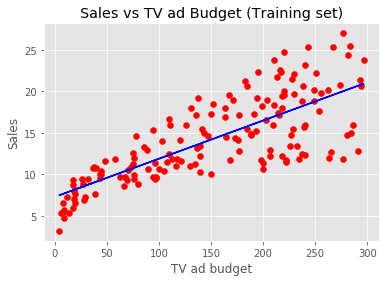

In [363]:
#plot for the Train

# plotting the observation line
plt.scatter(X1_train, y1_train, color='red') 

# plotting the regression line
plt.plot(X1_train, slg1.predict(X1_train), color='blue') 
 
# stating the title of the graph
plt.title("Sales vs TV ad Budget (Training set)") 

# adding the name of x-axis
plt.xlabel("TV ad budget") 

# adding the name of y-axis
plt.ylabel("Sales") 

# specifies end of graph
plt.show() 

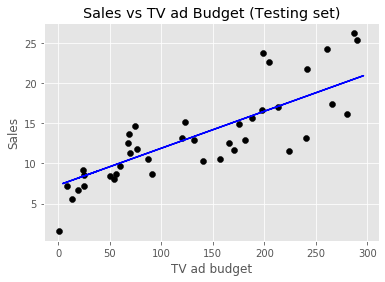

In [364]:
#plot for the Test
 
# plotting the observation line    
plt.scatter(X1_test, y1_test, color='black') 
 
# plotting the regression line    
plt.plot(X1_train, slg1.predict(X1_train), color='blue') 

# stating the title of the graph
plt.title("Sales vs TV ad Budget (Testing set)") 

# adding the name of x-axis
plt.xlabel("TV ad budget") 

# adding the name of y-axis
plt.ylabel("Sales")

# specifies end of graph
plt.show() 

In [365]:
# predict sales using existing test data
y_pred = slg1.predict(X1_test)
y_pred=pd.DataFrame(y_pred, columns=['Predicted Sales'])

In [366]:
y_pred

,Predicted Sales
0,10.476233
1,9.592883
2,11.451598
3,20.620950
4,15.123020
5,9.878132
6,7.692762
7,18.338964
8,8.387479
9,16.383633


Since we already have our equation. Then, we can use the equation to predict sales using TV ad budget using a new data.

In [367]:
# predict sales when the budget of TV Ad is 234.38 and 52.92
print('Predicted Sales when Tv ad budget is 234.38: ',slg1.predict([[234.38]]))
print('Predicted Sales when Tv ad budget is 52.93 : ',slg1.predict([[52.92]]))

Predicted Sales when Tv ad budget is 234.38:  [18.0757995]
Predicted Sales when Tv ad budget is 52.93 :  [9.727226]


C:\Users\vivia\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\vivia\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [368]:
# Simple Linear regression model of Radio ad budget predictor  variable
slg2 = LinearRegression()
slg2.fit(X2_train, y2_train)

# Genereating prediction on test set
slg2_train_pred = slg2.predict(X2_train)

# prints the evaluation metrics (RMSE and R-squared) on the train set
print('RMSE of train set:            ',np.sqrt(mean_squared_error(y2_train,slg2_train_pred)))
print('R-Squared of train set:      ',r2_score(y2_train, slg2_train_pred)*100,'%')

# prints the evaluation metrics (RMSE and R-squared) on the test set
slg2_test_pred = slg2.predict(X2_test)
print('RMSE of test set:              ',np.sqrt(mean_squared_error(y2_test,slg2_test_pred))) 
print('R-Squared of test set:       ',r2_score(y2_test, slg2_test_pred)*100,"%")

slg2_MAPE = MAPE(y2_test,slg2_test_pred)
print("MAPE value:                  ",slg2_MAPE)
Accuracy = 100 - slg2_MAPE
print('Accuracy of Linear Regression: {:0.2f}%.'.format(Accuracy))

RMSE of train set:             4.073876153878389
R-Squared of train set:       35.67184526312847 %
RMSE of test set:               4.923132441559148
R-Squared of test set:        22.98169224191596 %
MAPE value:                   54.45810292644624
Accuracy of Linear Regression: 45.54%.


In [369]:
# retrieving the intercept and the coefficients
print(slg2.intercept_,slg2.coef_)

9.387577017342657 [0.20651177]


We observe that our equation become: Y = 8.8201 + 0.2230 * Radio. So we could use this equation to predict sales on Radio ad budget.

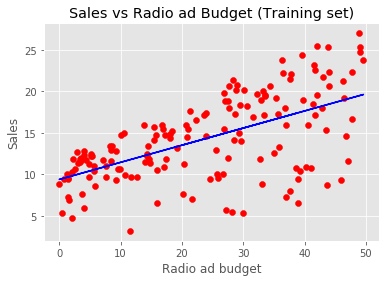

In [370]:
#plot for the TRAIN

# plotting the observation line
plt.scatter(X2_train, y2_train, color='red') 

# plotting the regression line
plt.plot(X2_train, slg2.predict(X2_train), color='blue') 

# stating the title of the graph
plt.title("Sales vs Radio ad Budget (Training set)") 

# adding the name of x-axis
plt.xlabel("Radio ad budget") 

# adding the name of y-axis
plt.ylabel("Sales")

# specifies end of graph
plt.show() 

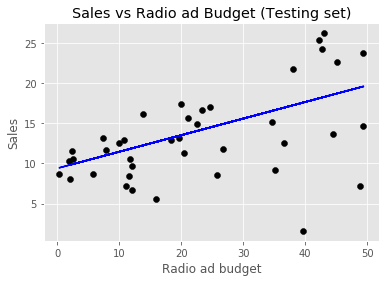

In [371]:
#plot for the Test

# plotting the observation line
plt.scatter(X2_test, y2_test, color='black') 

# plotting the regression line
plt.plot(X2_test, slg2.predict(X2_test), color='blue') 

# stating the title of the graph
plt.title("Sales vs Radio ad Budget (Testing set)") 

# adding the name of x-axis
plt.xlabel("Radio ad budget") 

# adding the name of y-axis
plt.ylabel("Sales")

# specifies end of graph
plt.show() 

In [372]:
# predict sales using existing test data
y_pred = slg2.predict(X2_test)
y_pred=pd.DataFrame(y_pred, columns=['Predicted Sales'])
y_pred

,Predicted Sales
0,13.621068
1,11.783113
2,9.449531
3,18.123025
4,10.998369
5,10.564694
6,19.486002
7,10.895113
8,16.636140
9,14.199301


Since we already have our equation. Then, we can use the equation to predict sales using Radio ad budget using a new data.

In [373]:
# predict sales when the budget of Radio Ad is 234.38 and 52.92
print('Predicted Sales when Radio ad budget is 234.38: ',slg2.predict([[234.38]]))
print('Predicted Sales when Radio ad budget is 52.92 : ',slg2.predict([[52.92]]))

Predicted Sales when Radio ad budget is 234.38:  [57.78980459]
Predicted Sales when Radio ad budget is 52.92 :  [20.31617964]


C:\Users\vivia\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\vivia\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [374]:
# Simple Linear regression model of Newspaper predictor  variable
slg3 = LinearRegression()
slg3.fit(X3_train, y3_train)

# Genereating prediction on test set
slg3_train_pred = slg3.predict(X3_train)

# prints the evaluation metrics (RMSE and R-squared) on the train set
print('RMSE of train set:            ',np.sqrt(mean_squared_error(y3_train,slg3_train_pred)))
print('R-Squared of train set:      ',r2_score(y3_train, slg3_train_pred)*100,'%')

# prints the evaluation metrics (RMSE and R-squared) on the test set
slg3_test_pred = slg3.predict(X1_test)
print('RMSE of est set:              ',np.sqrt(mean_squared_error(y3_test,slg3_test_pred))) 
print('R-Squared of test set:       ',r2_score(y3_test, slg3_test_pred)*100,"%")

slg3_MAPE = MAPE(y3_test,slg3_test_pred)
print("MAPE value:                  ",slg3_MAPE)
Accuracy = 100 - slg3_MAPE
print('Accuracy of Linear Regression: {:0.2f}%.'.format(Accuracy))

RMSE of train set:             4.913020577990066
R-Squared of train set:       6.44163673549869 %
RMSE of est set:               7.865043138326429
R-Squared of test set:        -96.56815054996217 %
MAPE value:                   77.82580257060516
Accuracy of Linear Regression: 22.17%.


C:\Users\vivia\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- TV
Feature names seen at fit time, yet now missing:
- Newspaper

  warnings.warn(message, FutureWarning)


In [375]:
# retrieving the intercept and the coefficients
print(slg3.intercept_,slg3.coef_)

12.400810905018648 [0.06030378]


We observe that our equation become: Y =11.8667 + 0.0627 * Newspaper. So we could use this equation to predict sales on Newspaper ad budget.

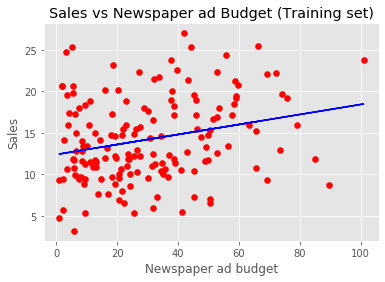

In [376]:
#plot for the TRAIN

# plotting the observation line
plt.scatter(X3_train, y3_train, color='red') 

# plotting the regression line
plt.plot(X3_train, slg3.predict(X3_train), color='blue') 

# stating the title of the graph
plt.title("Sales vs Newspaper ad Budget (Training set)") 

# adding the name of x-axis
plt.xlabel("Newspaper ad budget") 

# adding the name of y-axis
plt.ylabel("Sales") 

# specifies end of graph
plt.show() 

C:\Users\vivia\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Radio
Feature names seen at fit time, yet now missing:
- Newspaper

  warnings.warn(message, FutureWarning)


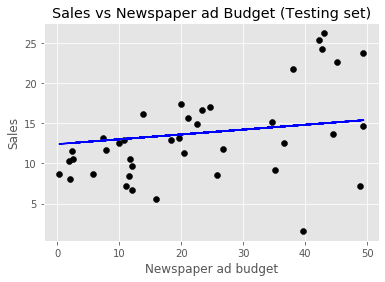

In [377]:
# plot for the Test
 
# plotting the observation line
plt.scatter(X2_test, y2_test, color='black')

# plotting the regression line 
plt.plot(X2_test, slg3.predict(X2_test), color='blue')

# stating the title of the graph
plt.title("Sales vs Newspaper ad Budget (Testing set)")
 
# adding the name of x-axis    
plt.xlabel("Newspaper ad budget") 

# adding the name of y-axis
plt.ylabel("Sales")

# specifies end of graph
plt.show() 

In [378]:
# predict sales using existing test data
y_pred = slg3.predict(X3_test)
y_pred=pd.DataFrame(y_pred, columns=['Predicted Sales'])
y_pred

,Predicted Sales
0,13.504370
1,13.510400
2,13.799859
3,15.488364
4,14.523504
5,14.191833
6,16.923594
7,12.925454
8,16.374830
9,13.257125


Since we already have our equation. Then, we can use the equation to predict sales using Newspaper ad budget using a new data.

In [379]:
# predict sales when the budget of Newspaper Ad is 234.38 and 52.92
print('Predicted Sales when Newspaper ad budget is 234.38: ',slg3.predict([[234.38]]))
print('Predicted Sales when Newspaper ad budget is 52.92:  ',slg3.predict([[52.92]]))

Predicted Sales when Newspaper ad budget is 234.38:  [26.53481112]
Predicted Sales when Newspaper ad budget is 52.92:   [15.592087]


C:\Users\vivia\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\vivia\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


We can observe that our results shows that TV ad budget had the best model compared to the rest since the MSE was small and R-squared was big. However, this doesn't mean that Simple Linear Regression is the best model. We have seen how this method is tideous especially if our dataset would have many variables. It takes a lot of time to compute each predictor and thus, we say that Simple Linear Regression is only suitable for one variable as predictor variable. When we have multiple variables, it is best to use Multiple linear regression since it saves time. Hence, we will look into Multiple linear regression using the same dataset of advetisment.

# b. Multiple Linear Regression

Useful approach in predicting a response variable on the basis of multiple predictor variables

Equation: Y = Beta_0 + Beta_1 * X_1 + Beta_2 * X_2 + ......+ Beta_p * X_p + epsilon, where Beta_0, Beta_1, Beta_2,....., Beta_p are coefficients / parameters

# Standardizing Dataset

In [380]:
#scale the data to have mean 0 stdev 1
from sklearn import preprocessing 

ad_scaled = preprocessing.scale(ad)
ad_scaled = pd.DataFrame(ad)

In [381]:
# Creating the training and Test datasets

#independent variable array
X = ad_scaled.iloc[:,:-1]

#dependent variable vector
y = ad_scaled.iloc[:,1] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print(X_train.shape)
print(X_test.shape)

def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

(140, 3)
(60, 3)


In [382]:
# Multiple Linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Genereating prediction on test set
lm_train_pred = lm.predict(X_test)

# looking at scores for train and test set
print('lm score for train set',lm.score(X_train, y_train))
print('lm score for test set',lm.score(X_test, y_test))

# calculating Mean Squared Error (MSE)
mse = np.mean((lm_train_pred - y_test)**2)
print("MSE on test set: ", mse)

Lm_MAPE = MAPE(y_test,lm_train_pred)
print("MAPE value: ",Lm_MAPE)
Accuracy = 100 - Lm_MAPE
print('Accuracy of Linear Regression: {:0.2f}%.'.format(Accuracy))

# placing coefficients together with their corresponding variables names
lm_coeff = pd.DataFrame()
lm_coeff['Columns'] = X_train.columns
lm_coeff['Coefficient Estimate'] = pd.Series(lm.coef_)
print(lm_coeff)

lm score for train set 1.0
lm score for test set 1.0
MSE on test set:  3.055952647863595e-29
MAPE value:  9.448544591523216e-14
Accuracy of Linear Regression: 100.00%.
     Columns  Coefficient Estimate
0         TV          8.710838e-18
1      Radio          1.000000e+00
2  Newspaper         -1.110223e-16


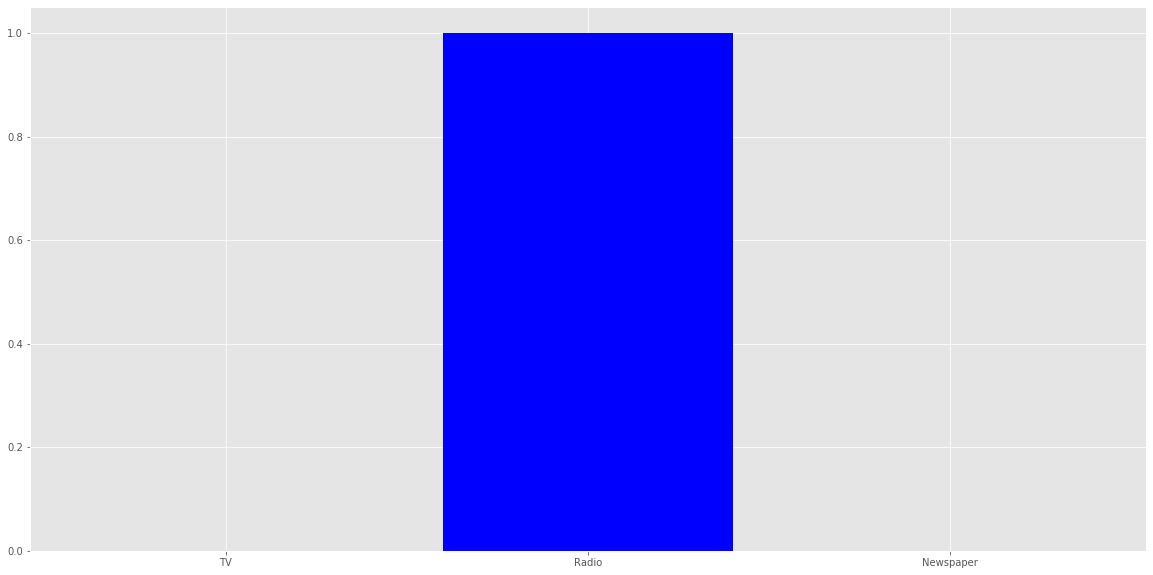

In [383]:
fig, ax = plt.subplots(figsize=(20,10))

color = ["red", 'blue', 'green', 'orange', 'purple', 'black', 'brown', 'pink', 'grey', 'olive']

ax.bar(lm_coeff['Columns'], lm_coeff['Coefficient Estimate'], color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [384]:
# predict sales using existing test data
y_pred = lm.predict(X_test)
y_pred=pd.DataFrame(y_pred, columns=['Predicted Sales'])
y_pred

,Predicted Sales
0,20.5
1,11.6
2,0.3
3,42.3
4,7.8
5,5.7
6,48.9
7,7.3
8,35.1
9,23.3


Since we already have our equation. Then, we can use the equation to predict sales using TV, Radion, adn Newspaper ad budget using a new data.

In [385]:
# predict sales when the budget of TV, Radio, and Newspaper Ad is 234.38, 160.39, and 70.48.
print('Predicted Sales when TV, Radio, and Newspaper Ad ad budget is 234.38, 160.39, and 70.48: ',lm.predict([[234.38, 160.39, 70.48]]))

# predict sales when the budget of TV, Radio, and Newspaper Ad is 52.35, 78.37, and 10.33.
print('Predicted Sales when TV, Radio, and Newspaper Ad ad budget is 52.35, 78.37, and 10.33:   ',lm.predict([[52.35, 78.37, 10.33]]))

Predicted Sales when TV, Radio, and Newspaper Ad ad budget is 234.38, 160.39, and 70.48:  [160.39]
Predicted Sales when TV, Radio, and Newspaper Ad ad budget is 52.35, 78.37, and 10.33:    [78.37]


C:\Users\vivia\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\vivia\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


We observe that Multiple Linear Regression model is the best model since the results shows that MSE is small, R^2 is 100%, and has an accuracy of 100%. In addition, we observe predictor variable are statistically significant with a p-value less than 0.05.

# II. Logistic Regression

Logistic Regression is focused on categorical variables. Logistic regression models the probability that Y belongs to a particular category. In Logistic regression the dependent variable is a binary vaiable that contains data coded as 1(YES, etc) or 0(NO, etc). Logistic regression model predicts P(Y=1) as a function of X. 

In [386]:
# Loading dataset
credit_card = pd.read_csv('Credit.csv')

In [387]:
# Looking at the first 5 column of the FirstYearGPA dataset
credit_card.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [388]:
# Looking at the dtype
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   Income      400 non-null    float64
 2   Limit       400 non-null    int64  
 3   Rating      400 non-null    int64  
 4   Cards       400 non-null    int64  
 5   Age         400 non-null    int64  
 6   Education   400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  Balance     400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [389]:
# statistical summary
credit_card.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


# DATA VISUALIZATION

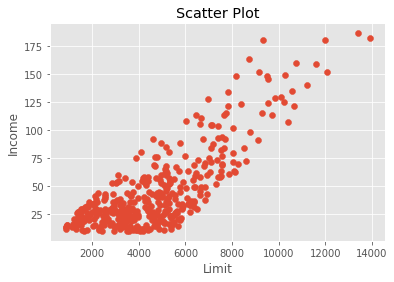

In [390]:
# Scatter plot with Limit against Income
plt.scatter(credit_card['Limit'], credit_card['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Limit')
plt.ylabel('Income')
  
plt.show()

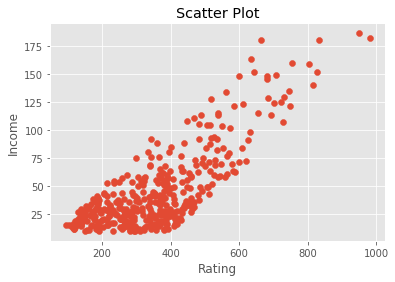

In [391]:
# Scatter plot with Rating against Income
plt.scatter(credit_card['Rating'], credit_card['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Rating')
plt.ylabel('Income')
  
plt.show()

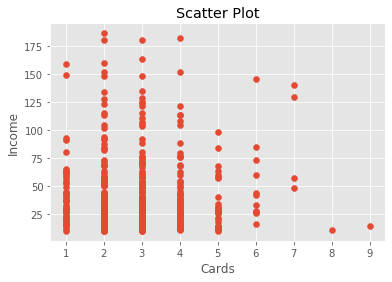

In [392]:
# Scatter plot with Cards against Income
plt.scatter(credit_card['Cards'], credit_card['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Cards')
plt.ylabel('Income')
  
plt.show()

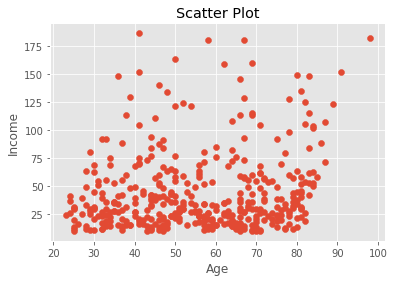

In [393]:
# Scatter plot with Age and Income
plt.scatter(credit_card['Age'], credit_card['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Age')
plt.ylabel('Income')
  
plt.show()

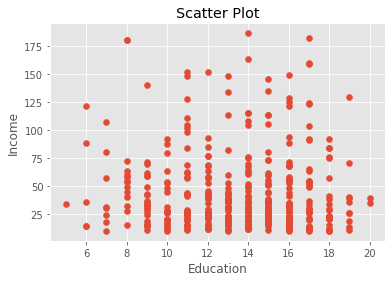

In [394]:
# Scatter plot with Education and Income
plt.scatter(credit_card['Education'], credit_card['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Education')
plt.ylabel('Income')
  
plt.show()

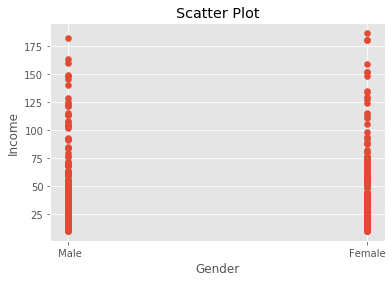

In [395]:
# Scatter plot with Gender and Income
plt.scatter(credit_card['Gender'], credit_card['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Gender')
plt.ylabel('Income')
  
plt.show()

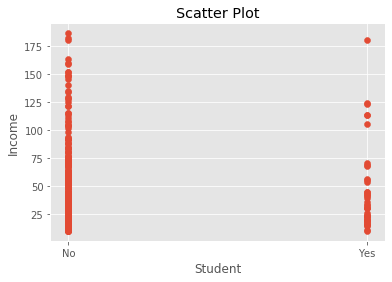

In [396]:
# Scatter plot with Student and Income
plt.scatter(credit_card['Student'], credit_card['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Student')
plt.ylabel('Income')
  
plt.show()

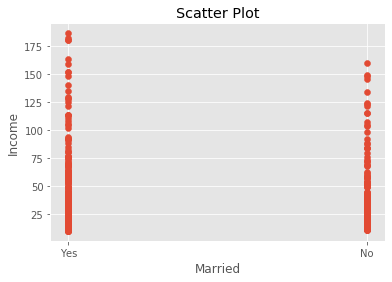

In [397]:
# Scatter plot with Married and Income
plt.scatter(credit_card['Married'], credit_card['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Married')
plt.ylabel('Income')
  
plt.show()

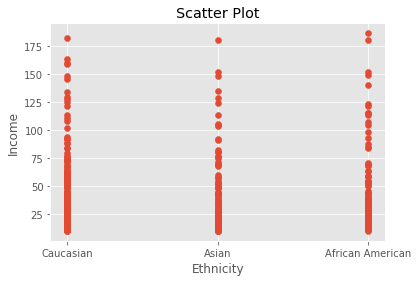

In [398]:
# Scatter plot with Ethnicity and Income
plt.scatter(credit_card['Ethnicity'], credit_card['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Ethnicity')
plt.ylabel('Income')
  
plt.show()

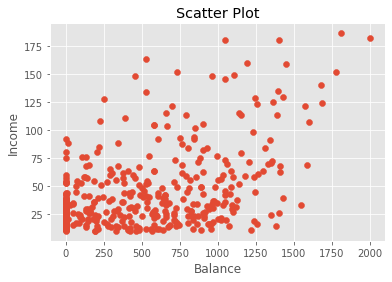

In [399]:
# Scatter plot with Balance and Income
plt.scatter(credit_card['Balance'], credit_card['Income'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Balance')
plt.ylabel('Income')
  
plt.show()

# Standardizing Variables

Replacing categorical variables with 0 and 1. 

Gender: Female - 1, Male - 0

Student: Yes - 1 , No - 0

Married: Yes - 0, No - 0

Ethnicity: Caucacian - 0 , Asian - 1 , African America - 2

In [400]:
credit_card['Gender'] = pd.factorize(credit_card['Gender'])[0]
credit_card['Student'] = pd.factorize(credit_card['Student'])[0]
credit_card['Married'] = pd.factorize(credit_card['Married'])[0]
credit_card['Ethnicity'] = pd.factorize(credit_card['Ethnicity'])[0]
credit_card.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,0,0,0,0,333
1,2,106.025,6645,483,3,82,15,1,1,0,1,903
2,3,104.593,7075,514,4,71,11,0,0,1,1,580
3,4,148.924,9504,681,3,36,11,1,0,1,1,964
4,5,55.882,4897,357,2,68,16,0,0,0,0,331


In [401]:
credit = credit_card[["Income", "Student", "Balance","Gender"]]
credit.head()

,Income,Student,Balance,Gender
0,14.891,0,333,0
1,106.025,1,903,1
2,104.593,0,580,0
3,148.924,0,964,1
4,55.882,0,331,0


In [402]:
# scale the data to have mean 0 stdev 1
credit_card_scaled = preprocessing.scale(credit)
credit_card_scaled = pd.DataFrame(credit)

We will build our model on the training set and evaluate its performance on the test set. This is called the holdout-validation approach for evaluating model performance.

X : independent variables (Other variables except Gender)

y : dependent variables (Gender)

The output shows that the shape of the training set has 320 observation of 3 variables and test set has 80 observation of 3 variables.

In [403]:
# Creating the training and Test datasets
#independent variable array
X = credit_card_scaled.iloc[:,:-1]

#dependent variable vector
y = credit_card_scaled.iloc[:,1] 

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.20, random_state=40)

print(X_train1.shape)
print(X_test1.shape)

def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape


(320, 3)
(80, 3)


In [404]:
# Importing Logistic regression library
from sklearn.linear_model import SGDClassifier

In [405]:
# Logistic regression model
lg = SGDClassifier() 
lg.fit(X_train1, y_train1)

# making prediction
y_pred1 = lg.predict(X_test1)

# Model Evaluation using Confusion Matrix

Confusion matrix is a table that is used to evaluate the performance of a classification model

In [406]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test1, y_pred1)
cnf_matrix

array([[71,  0],
       [ 9,  0]], dtype=int64)

The result shown for our confusion matrix describes that the demision of the matrix is n*n because this model is binary classification where we have two classes 0 and 1. In addition, we observe that we have diagonal values 71 and 0 which represents accurate prediction , while non-diagonal values 0 and 9 represents inaccurate predictions. In other words, the first row tells us 71 as true negatives and 0 as false positive. The second row, we have that 9 as false negative and 0 as true positives.

A perfect classifier would have only true positives and true negatives, so our confusion matrix would have nonzero values on its main diagonal.

Text(0.5, 257.44, 'Predicted label')

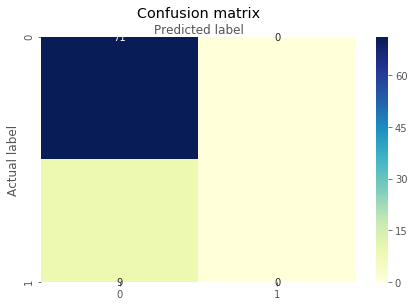

In [407]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [408]:
# Evaluating the model on test data
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

# from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test1, y_pred1))

Accuracy: 0.8875
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        71
           1       0.00      0.00      0.00         9

    accuracy                           0.89        80
   macro avg       0.44      0.50      0.47        80
weighted avg       0.79      0.89      0.83        80



C:\Users\vivia\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vivia\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vivia\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We can observe a classification rate of 88.75%

# III. Polynomial Regression

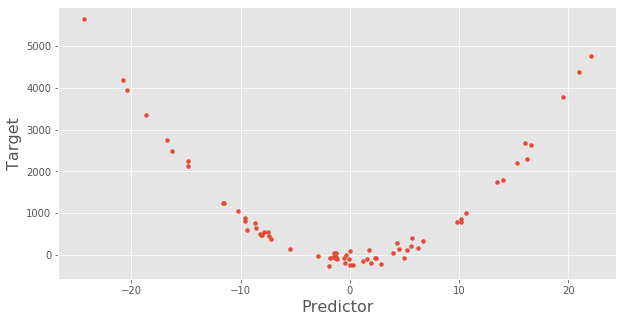

In [409]:
# creating a dataset with curvilinear relationship
X=10*np.random.normal(0,1,70)
y=10*(X**2)+np.random.normal(-100,100,70)

# plotting dataset
plt.figure(figsize=(10,5))
plt.scatter(X,y,s=15)
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

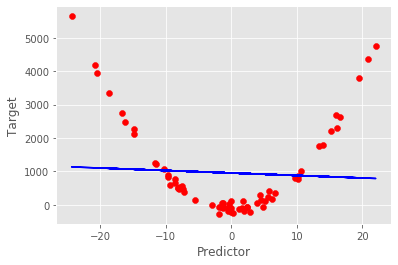

In [410]:
# Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1,1), y.reshape(-1,1))
y_pred=lin_reg.predict(X.reshape(-1,1))

# Visualizing the Linear Regression results
plt.scatter(X, y, color = 'red') # plotting the training set
plt.plot(X, y_pred, color = 'blue') # plotting the linear regression line
plt.xlabel('Predictor') # adds a label to the x-axis
plt.ylabel('Target') # adds a label to the y-axis
plt.show() # prints our plot

In [411]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X.reshape(-1,1),y.reshape(-1,1))

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

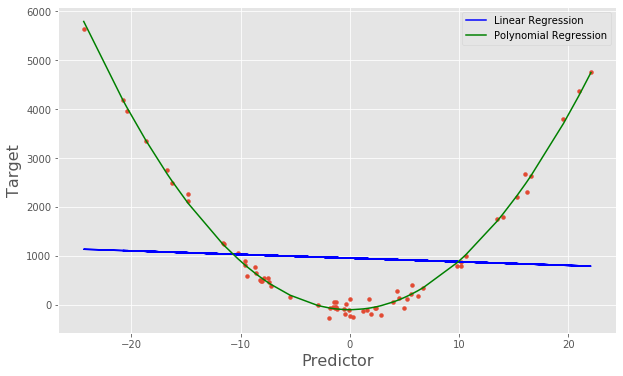

In [412]:
poly_pred=pipe.predict(X.reshape(-1,1))
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(X,poly_pred))
X_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(X,y,s=15)
plt.plot(X,y_pred,color='b',label='Linear Regression')
plt.plot(X_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()

# 2. Classification

# I. Suppor Vector Machine (SVM)

Support vector machine is applied in face detection, text and hypertext categorization, classification of images, and Bioinformatics. SVM is a supervised learning method that looks at data and sorts it into one of the two categories. 

In [413]:
# import library for svm and dataset
from sklearn import svm
from sklearn import datasets

In [414]:
# import dataset
cancer = datasets.load_breast_cancer()

In [415]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [416]:
# print data(feature)shape
cancer.data.shape

(569, 30)

In [417]:
# Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2,random_state=40)

In [418]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [419]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9473684210526315
[[37  2]
 [ 4 71]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        39
           1       0.97      0.95      0.96        75

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [420]:
#Create a svm Classifier
clf2 = svm.SVC(kernel='sigmoid') # Linear Kernel

#Train the model using the training sets
clf2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf2.predict(X_test)

In [421]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.4824561403508772
[[ 6 33]
 [26 49]]
              precision    recall  f1-score   support

           0       0.19      0.15      0.17        39
           1       0.60      0.65      0.62        75

    accuracy                           0.48       114
   macro avg       0.39      0.40      0.40       114
weighted avg       0.46      0.48      0.47       114



In [422]:
#Create a svm Classifier
clf3 = svm.SVC(kernel='poly') # Linear Kernel

#Train the model using the training sets
clf3.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf3.predict(X_test)

In [423]:

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9122807017543859
[[32  7]
 [ 3 72]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        39
           1       0.91      0.96      0.94        75

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



In [424]:
# Get number of support vectors per class
support_vectors_per_class = clf.n_support_
print(support_vectors_per_class)

[25 25]


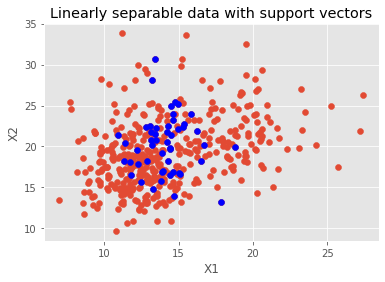

In [425]:
# Get support vectors themselves
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='blue')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

We observe that SVM with kernel = Linear is the best model with an accuracy of 94.74%.

# II. Decision Tree

Tree-based involves stratifying or segmenting the predictor space into a number of simple regions. In order to make a prediction for a given observation, we typically use the mean or the mode of the training observation in the region to which it belongs. The set of splitting rules used to segment the predictor space can be summarized in a tree. These types of approaches are known as decision tree methods. Decision trees can be applied to both regression and classification problems. 

The Decision tree is like a tree with noded. The branches depend on number of factors. It splits data into branches like these till it achieves a threshold value. A decision tree consists of the root nodes, children nodes, and leaf nodes.

# a. Regression Trees

We will use the Hitters dataset to predict a baseball player's salary based on years ( the number of years that he has played in the major leagues) and Hits (the number of hits that he made in the previous year).

In [426]:
# importing Hitters dataset
hit = pd.read_csv("Hitters.csv")

In [427]:
# looking at the first column of the dataset
hit.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [428]:
# Looking if dataest has null values
hit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

We can observe that salary has null values; therefore, we will first remove observations that are missing salary values and log-transform salary so that its distribution has more of a typical bell-shaped.

In [429]:
# new dataset with removed null values
hit = hit.dropna()

hit1 = hit[["Hits", "Years", "Salary"]]

hit1.head()

,Hits,Years,Salary
1,81,14,475.0
2,130,3,480.0
3,141,11,500.0
4,87,2,91.5
5,169,11,750.0


In [430]:
features = ["Hits", "Years"]

# independent variable (Years)
X_tree = hit[features]

# dependent variable (salary)
y_tree = hit['Salary'].astype(int)

print(X_tree)
print(y_tree)

# spliting dataset into train and test data

X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size = 0.2, random_state = 40)

     Hits  Years
1      81     14
2     130      3
3     141     11
4      87      2
5     169     11
..    ...    ...
317   127      5
318   136     12
319   126      6
320   144      8
321   170     11

[263 rows x 2 columns]
1       475
2       480
3       500
4        91
5       750
       ... 
317     700
318     875
319     385
320     960
321    1000
Name: Salary, Length: 263, dtype: int32


In [431]:
# Importing decision tree library
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# making prediction
dtree_pred = dtree.predict(X_test)

print(dtree_pred)

print("Accuracy:",metrics.accuracy_score(y_test, dtree_pred))

[ 940  475  430  125  430   75  416  230  430 1220 1000 1237  475   90
   90  140  180  300  525   90  250 1220   90  100 1043  600  750  430
  100  240  260  250 1150 1300  750  400  750   68 1043  145   75  708
  525  190 1670  960  150  175  425   67  191  750  365]
Accuracy: 0.018867924528301886


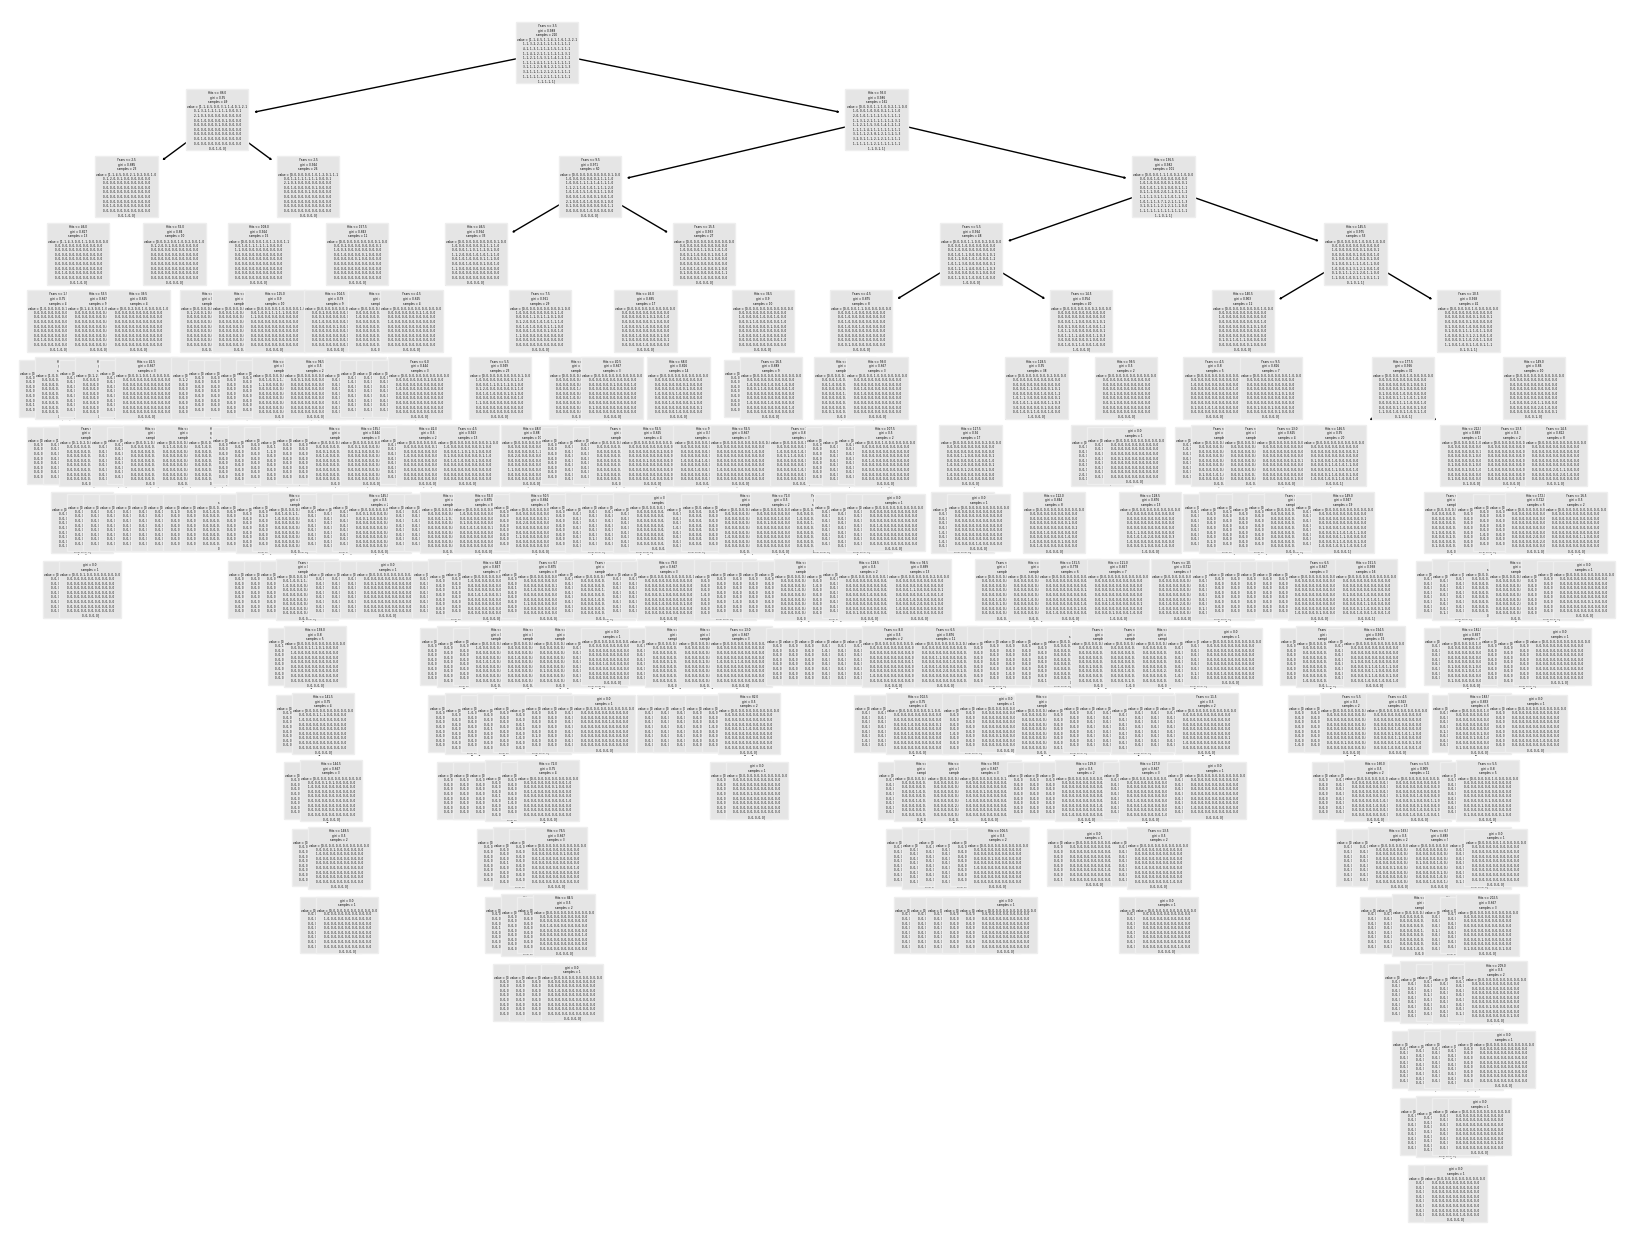

In [432]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=200)
plot_tree(dtree, feature_names=X_tree.columns);

Our model has an accuracy of 1.89%.

# b. Classification Trees

Here, we will use Heart dataset. These data contain a binary outcome HD for 303 patients who presented with chest pain.
An outcome value of Yes indicates the presence of heart disease based on an angiographic test, while No means no heart disease. There are 13 predictors including Age, Sex, Chol (a cholesterol measurement), and other heart and lung function measurements. 

In [433]:
# importing Heart dataset
heart = pd.read_csv("Heart.csv")

heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [434]:
heart = heart.dropna()

heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  297 non-null    int64  
 1   Age         297 non-null    int64  
 2   Sex         297 non-null    int64  
 3   ChestPain   297 non-null    object 
 4   RestBP      297 non-null    int64  
 5   Chol        297 non-null    int64  
 6   Fbs         297 non-null    int64  
 7   RestECG     297 non-null    int64  
 8   MaxHR       297 non-null    int64  
 9   ExAng       297 non-null    int64  
 10  Oldpeak     297 non-null    float64
 11  Slope       297 non-null    int64  
 12  Ca          297 non-null    float64
 13  Thal        297 non-null    object 
 14  AHD         297 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 37.1+ KB


In [435]:
heart['ChestPain'] = pd.factorize(heart['ChestPain'])[0]
heart['Thal'] = pd.factorize(heart['Thal'])[0]
heart['AHD'] = pd.factorize(heart['AHD'])[0]
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,0,145,233,1,2,150,0,2.3,3,0.0,0,0
1,2,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1,1
2,3,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2,1
3,4,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1,0
4,5,41,0,3,130,204,0,2,172,0,1.4,1,0.0,1,0


In [436]:
features = ["Age", "Sex", "ChestPain", "RestBP", "Chol", "Fbs", "RestECG", "MaxHR", "ExAng", "Oldpeak", "Slope", "Ca", "Thal"]

# independent variable (Years)
X = heart[features]

# dependent variable (salary)
y = heart['AHD']

print(X)
print(y)

# spliting dataset into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

     Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0     63    1          0     145   233    1        2    150      0      2.3   
1     67    1          1     160   286    0        2    108      1      1.5   
2     67    1          1     120   229    0        2    129      1      2.6   
3     37    1          2     130   250    0        0    187      0      3.5   
4     41    0          3     130   204    0        2    172      0      1.4   
..   ...  ...        ...     ...   ...  ...      ...    ...    ...      ...   
297   57    0          1     140   241    0        0    123      1      0.2   
298   45    1          0     110   264    0        0    132      0      1.2   
299   68    1          1     144   193    1        0    141      0      3.4   
300   57    1          1     130   131    0        0    115      1      1.2   
301   57    0          3     130   236    0        2    174      0      0.0   

     Slope   Ca  Thal  
0        3  0.0     0  
1  

In [437]:
dctree = DecisionTreeClassifier()
dctree.fit(X_train, y_train)

# making prediction
dctree_pred = dctree.predict(X_test)

print(dctree_pred)

print("Accuracy:",metrics.accuracy_score(y_test, dctree_pred))
print(confusion_matrix(y_test, dctree_pred))
print(classification_report(y_test, dctree_pred))

[0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0
 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0]
Accuracy: 0.7333333333333333
[[22  7]
 [ 9 22]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.73        29
           1       0.76      0.71      0.73        31

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.73      0.73      0.73        60



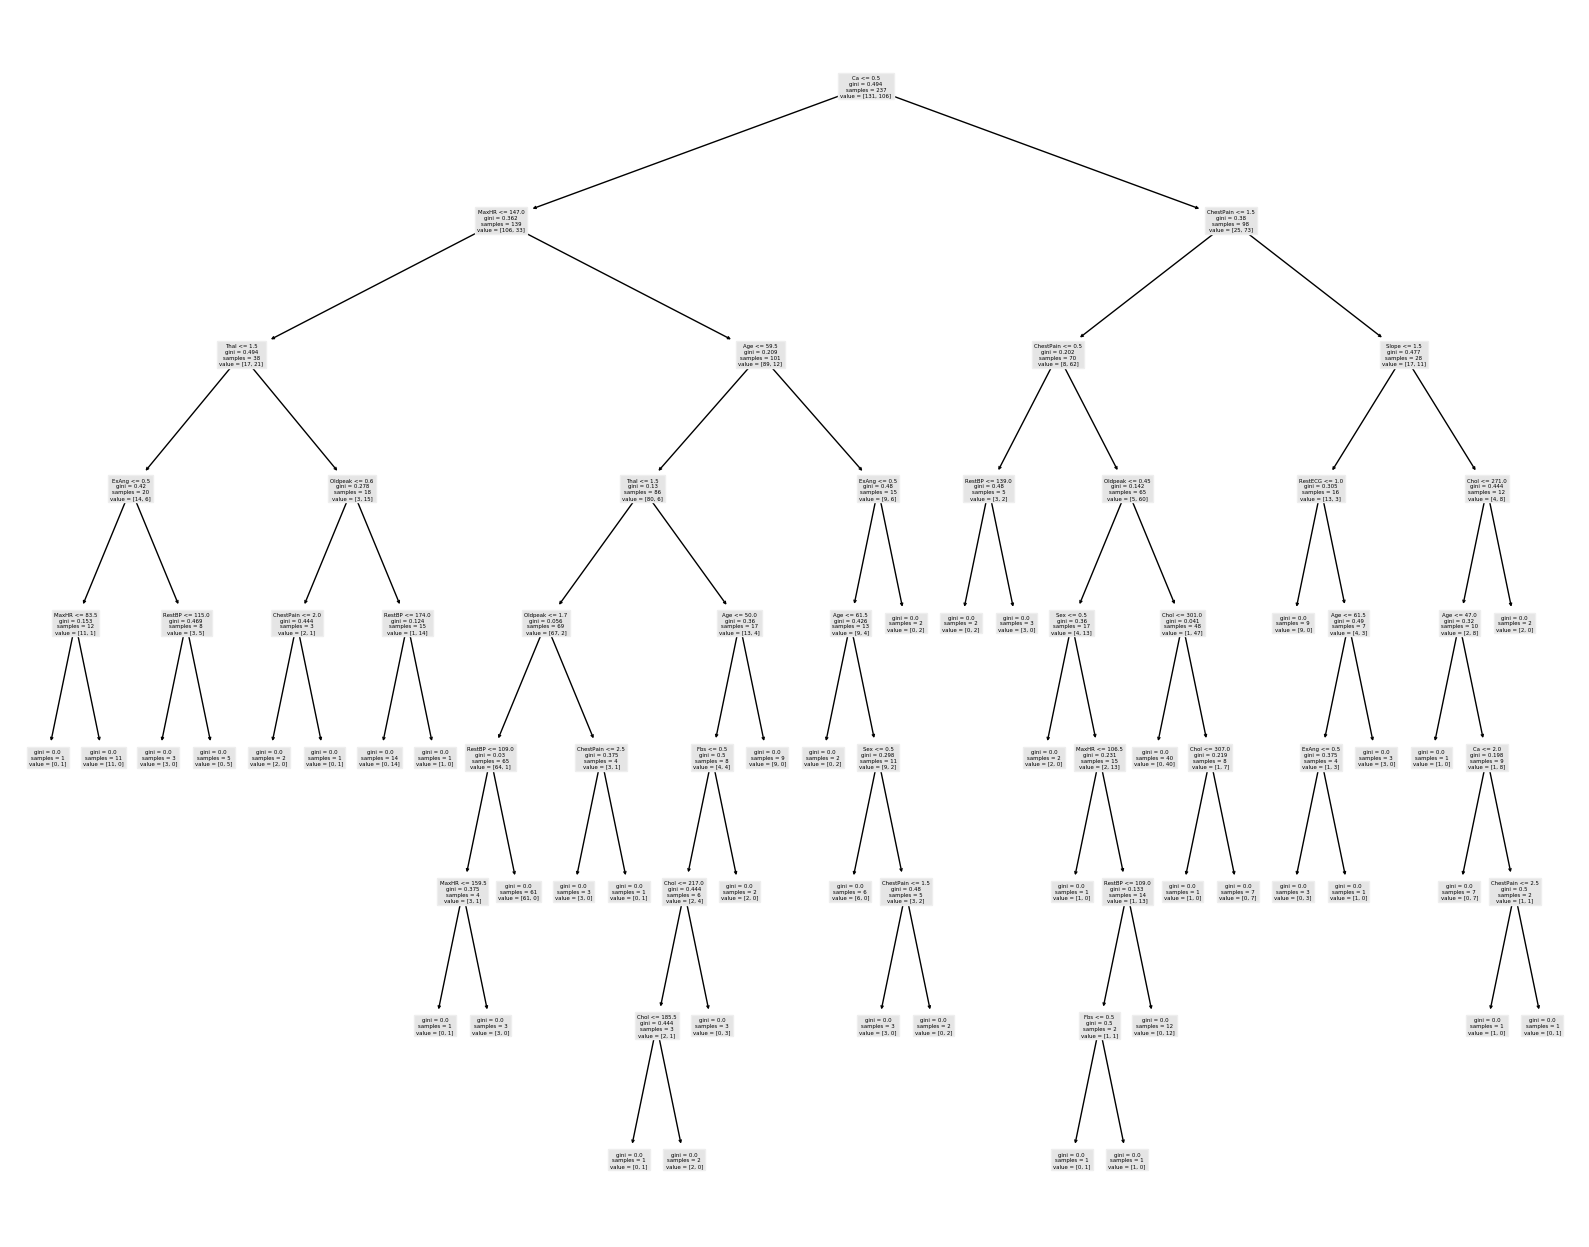

In [438]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=200)
plot_tree(dctree, feature_names=X.columns);

Our model has an accuracy of 73%.

# III. K-Nearest Neighbor (KNN)

KNN is based on feature similarity, this allows us to do classification using KNN Classifier. It is one of the simplest Supervised Machine Learning algorithm mostly used for Classification.

KNN classifies a data point based on how its neighbors are classified. We have to choose the right value of K to avoid bias by using the process called parameter tuning.

We use KNN when data is labeled, is noise free, and small.

In [439]:
# Importing Iris Dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Types']

# Read dataset to pandas dataframe
Iris = pd.read_csv(url, names=names)

In [440]:
# Looking at the first columns of the dataset
Iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Types
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [441]:
# Spliting our dataset into train and test

# independent variables
X = Iris.iloc[:,:-1].values

# dependent variable
y = Iris.iloc[:,4]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# creating training and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [442]:
# Importing KNN library
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

# making predictions
y_pred = classifier.predict(X_test)

In [443]:
# importing library for confusion matrix and classification report to calculate the metrics
# from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9  0  0]
 [ 0  7  1]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



Text(0, 0.5, 'Mean Error')

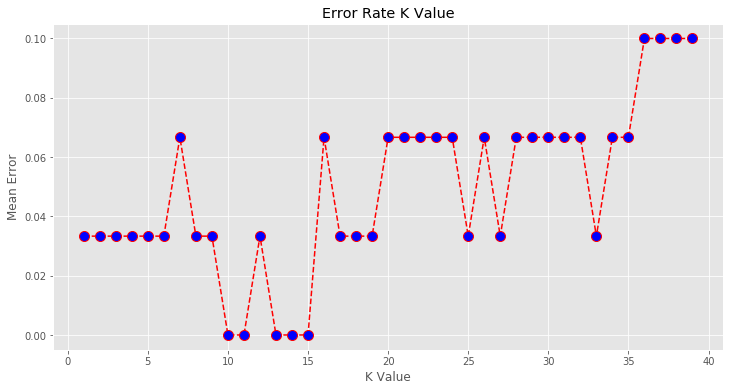

In [444]:
# determining the value of k
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_i = knn.predict(X_test)
    error.append(np.mean(y_pred_i != y_test))
    
# plotting error values against k values (1,40)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

We can observe that the results tells us that K-value of 2,3,4, and 12 would have the best result since the error rate is small. In or result of k = 2,3,4, and 12 we observe an accuracy of 97%.